# Import Library & Dataset

**Import Library**

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import Dataset**

In [29]:
file_path = "/content/DDoS_dataset.csv"
df = pd.read_csv(file_path)

# Data Structure

In [30]:
print("Info Dataset:")
print(df.info())

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852585 entries, 0 to 852584
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Highest Layer    852585 non-null  object 
 1   Transport Layer  852585 non-null  object 
 2   Source IP        852585 non-null  int64  
 3   Dest IP          852585 non-null  object 
 4   Source Port      852585 non-null  int64  
 5   Dest Port        852585 non-null  int64  
 6   Packet Length    852585 non-null  int64  
 7   Packets/Time     852585 non-null  float64
 8   target           852585 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 58.5+ MB
None


In [31]:
print("\n5 Data Pertama:")
print(df.head())


5 Data Pertama:
  Highest Layer Transport Layer  Source IP       Dest IP  Source Port  \
0           ARP             UDP          1   192.168.1.1            0   
1           ARP             UDP          0  192.168.1.10            0   
2           ARP             UDP          1   192.168.1.1            0   
3           ARP             UDP          0  192.168.1.12            0   
4           ARP             UDP          1   192.168.1.1            0   

   Dest Port  Packet Length  Packets/Time  target  
0          0             60          92.8       1  
1          0             42          92.9       0  
2          0             60         362.8       1  
3          0             42         362.8       0  
4          0             60         364.3       1  


In [32]:
print("\n5 Data Terakhir:")
print(df.tail())


5 Data Terakhir:
       Highest Layer Transport Layer  Source IP      Dest IP  Source Port  \
852580          DATA             UDP          0  192.168.1.1        50890   
852581          DATA             UDP          0  192.168.1.1        50890   
852582          DATA             UDP          0  192.168.1.1        50890   
852583          DATA             UDP          0  192.168.1.1        50890   
852584          DATA             UDP          0  192.168.1.1        50890   

        Dest Port  Packet Length  Packets/Time  target  
852580       5201            834          19.3       0  
852581       5201            834          19.8       0  
852582       5201            834          20.3       0  
852583       5201            834          20.8       0  
852584       5201            834          21.4       0  


In [33]:
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
           Source IP    Source Port      Dest Port  Packet Length  \
count  852585.000000  852585.000000  852585.000000  852585.000000   
mean        0.466506   48986.260599    4163.623361     770.617703   
std         0.498877   13175.856007    8453.836606     714.423026   
min         0.000000       0.000000       0.000000      42.000000   
25%         0.000000   49158.000000      80.000000      60.000000   
50%         0.000000   49158.000000    5201.000000     342.000000   
75%         1.000000   50890.000000    5201.000000    1514.000000   
max         1.000000   65530.000000   50890.000000    1514.000000   

        Packets/Time         target  
count  852585.000000  852585.000000  
mean      192.782676       0.466506  
std       143.208412       0.498877  
min         0.000000       0.000000  
25%        28.900000       0.000000  
50%       217.900000       0.000000  
75%       281.900000       1.000000  
max       484.400000       1.000000  


# Visualisasi data (EDA) beserta Insight

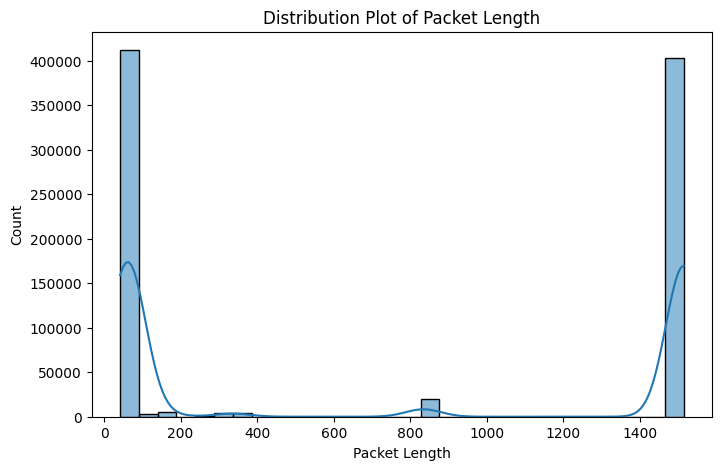

In [34]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Packet Length'], kde=True, bins=30)
plt.title("Distribution Plot of Packet Length")
plt.xlabel("Packet Length")
plt.ylabel("Count")
plt.show()

**Insight :**

1. Distribusi Packet Length menunjukkan dua puncak utama di sekitar 60-100 bytes dan 1400-1500 bytes.
2. Menunjukkan bahwa sebagian besar paket dalam dataset memiliki panjang yang kecil atau besar, dengan sedikit paket di rentang menengah.

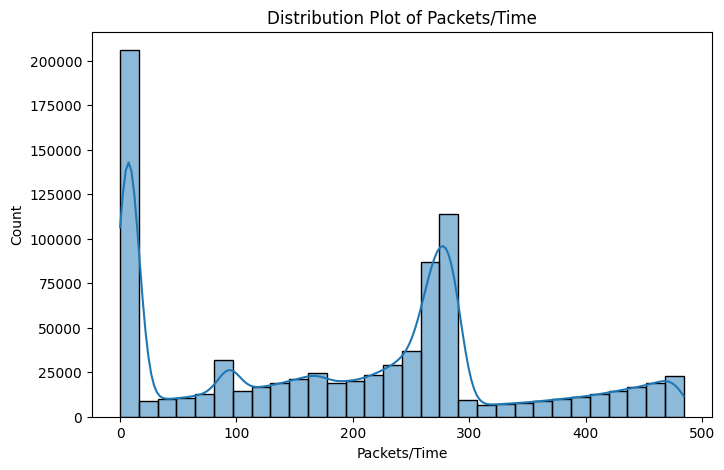

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Packets/Time'], kde=True, bins=30)
plt.title("Distribution Plot of Packets/Time")
plt.xlabel("Packets/Time")
plt.ylabel("Count")
plt.show()

**Insight :**

1. Terdapat banyak paket dengan jumlah Packets/Time yang kecil, tetapi ada beberapa lonjakan di sekitar 100, 200, dan 300 packets.
2. Dapat terindikasi pola tertentu dalam lalu lintas jaringan, misalnya, serangan DDoS yang mengirimkan paket dalam jumlah besar secara berkala.

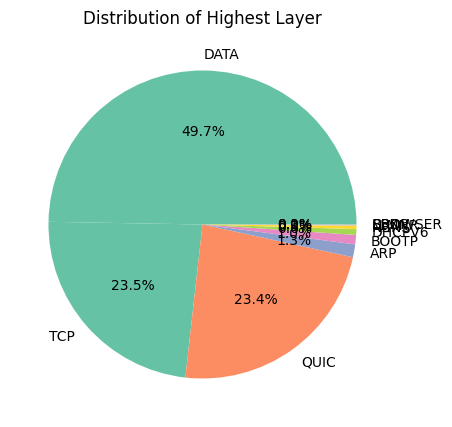

In [36]:
plt.figure(figsize=(8, 5))
df['Highest Layer'].value_counts().plot.pie(autopct='%1.1f%%', cmap='Set2')
plt.title("Distribution of Highest Layer")
plt.ylabel("")
plt.show()

**Insight :**

1. Protokol DATA (50.6%), QUIC (24.0%), dan TCP (21.9%) mendominasi.
2. Protokol lain seperti ARP, DHCPv6, BOOTP, dan BROWSER hanya memiliki persentase kecil.
3. Dominasi DATA dan QUIC menunjukkan bahwa lalu lintas jaringan lebih banyak berupa transmisi data besar, kemungkinan dari aplikasi berbasis internet modern.

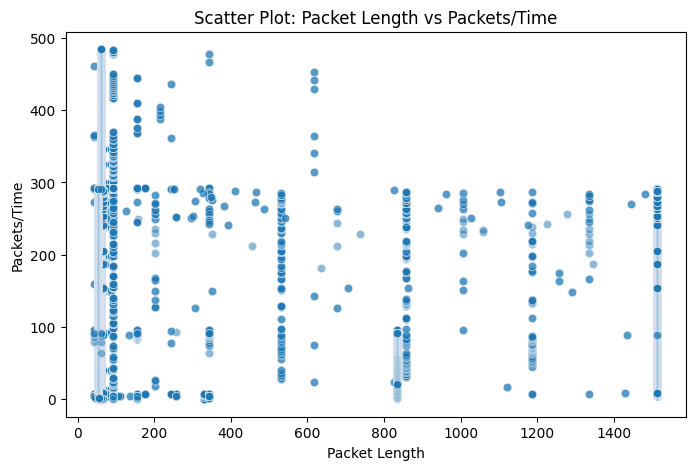

In [37]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Packet Length'], y=df['Packets/Time'], alpha=0.5)
plt.title("Scatter Plot: Packet Length vs Packets/Time")
plt.xlabel("Packet Length")
plt.ylabel("Packets/Time")
plt.show()

**Insight :**

1. Sebagian besar titik terkumpul di Packet Length kecil (di bawah 200), tetapi ada juga banyak titik di sekitar 1500 bytes.
2. Menunjukkan bahwa ada variasi besar dalam jumlah paket yang dikirimkan dalam periode tertentu, yang bisa menjadi indikasi aktivitas mencurigakan dalam jaringan.

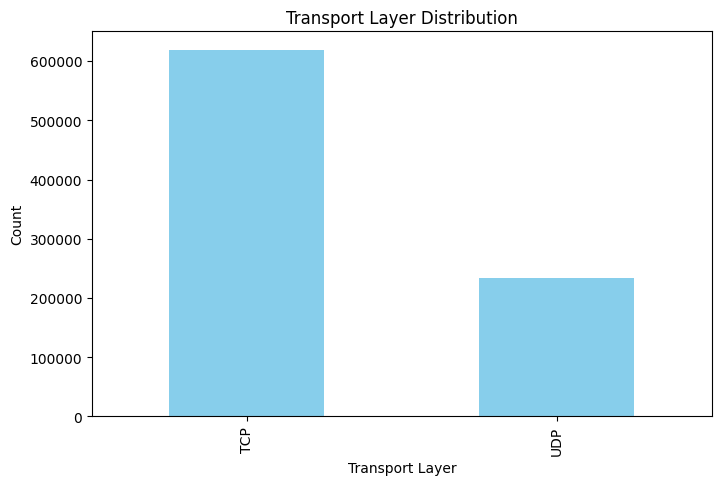

In [38]:
plt.figure(figsize=(8, 5))
df['Transport Layer'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Transport Layer Distribution")
plt.xlabel("Transport Layer")
plt.ylabel("Count")
plt.show()

**Insight :**

TCP lebih dominan dibandingkan UDP, yang menunjukkan bahwa mayoritas lalu lintas menggunakan atau memerlukan kestabilan yang tinggi.